# SCIPY Courses

Alors nous allons voir comment faire du calcul scientifique avec "scipy".

A l'intérieur de cet package on retrouve des outils absolument incroyables pour faire 
du machine learning. Et bizzarement pas mal de Data Scientists oublient de les utiliser ces outils là...

En l'occurrence on va voir comment faire des interpolations, de l'optimization de problème, du traitement du signal.
Et ça va inclure la transformée de Fourier qui est extrêmement puissant pour filtrer des signaux et on terminera ceci en voyant comment faire du traitement d'images avec "NdImage"

Alors quand on consulte la documentation officielle de scipy qui est disponible à cette addresse:

[https://docs.scipy.org/doc/scipy/reference/](https://docs.scipy.org/doc/scipy/reference/)

Et bien on peut se rendre compte que dans scipy, on a tout un tas de petits modules qui nous permettent de faire des actions scientifiques bien précises.

Par exemple on va retrouver un module pour faire de l'algèbre linéaire (**scipy.sparse.linalg**) ou un module pour faire des statistiques (**scipy.stats**)... En fait, c'est un peu comme dans **numpy**.

Donc on va s'intéresser au module **scipy.interpolate**:


## 1) Interpolation

En data science, il arrive souvent qu'on ait à disposition des datasets dans lesquels il manque des valeurs...

Il peut avoir plein de raisons à çà... Par exemple on peut avoir deux capteurs qui collectent des données avec des fréquences d'acquisition différentes:

Par exemple, **le capteur1** récolte des données chaque seconde et **le capteur2** chaque 3 secondes, alors quand on est dans ce genre de situation, on peut se dire...

Ah ouais, c'est dommage, on peut seulement se servir d' 1/3 de nos données vue que les 2/3 restants il y'a des problèmes de correspondances entre nos deux signaux...

Sauf que ces valeurs, ne sont pas pour autant gâchées à condition qu'on puisse les interpoler...

Alors pour illustrer tout çà imaginons que le capteur 2 nous donne ceci

In [20]:
import numpy as np
import matplotlib.pyplot as plt

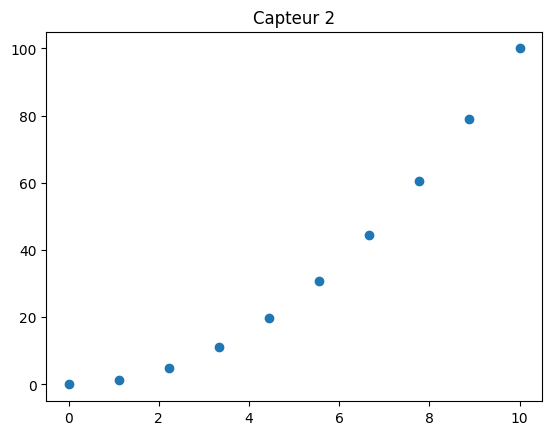

In [21]:
x = np.linspace(0, 10, 10)
y = x ** 2
plt.scatter(x, y)
plt.title("Capteur 2")
plt.show()

In [22]:
# Nous ce qu'on aimerait faire, c'est d'interpoler, c'est à dire de placer plus de points entre nos différents points bleus

# Alors pour faire cette interpolation, on va utiliser la fonction, "interp1d" qui est à l'intérrieur du module scipy.interpolate

from scipy.interpolate import interp1d

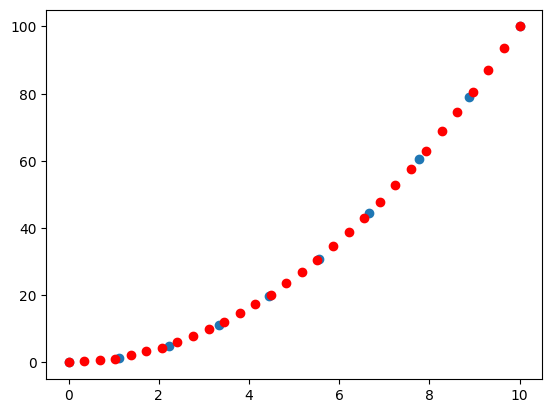

In [23]:
# Cette fonction va nous permettre de générer une autre fonction, disons f qui sera notre fonction d'interpolation

f = interp1d(x, y, kind='linear') # kind='' pour préciser le type d'interpolation qu'on veut avoir | ici interpolation linéaire qui nous trace une ligne entre deux points

# Mtn on a une fonction f dont on dispose et qu'on peut utiliser comme on veut...

# Par exemple on va pouvoir faire ceci:

new_x = np.linspace(0, 10, 30) # Création d'un nouveau x

result = f(new_x)

plt.scatter(x, y)
plt.scatter(new_x, result, c='red')
plt.show()


In [24]:
# On a donc ce resultat là

# Mtn quand on procède à une interpolation, il faut faire attention pour qu'elle ne cache pas ce qui se passe dans la réalité...


![](./images/interpolation_figs.png)

In [25]:
# Par exemple on pourrait très bien imaginer que entre nos différents bleus, il se produit une oscillation mais çà on a pas pu l'observer simplement parce que
# notre fréquence d'acquisition était trop faible sur notre capteur 2...
# Si on procède à une interpolation bête et méchante en se disant oh mais bah ça suit un parten quadratique..., eh bien on va complètement
# louper ces oscillations et ça peut donner des résultats très graves pour notre dataset.

Mtn pour finir on pourrait parler des différents types d'interpolation qui existent...

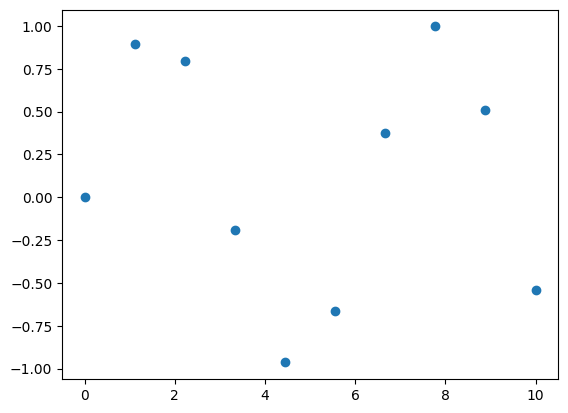

In [26]:
# on avait utilisé un type linéaire qui a sembler bien marcher...

# Mais si par exemple on avait un dataset qui ressemblait à çà:

x = np.linspace(0, 10, 10)
y = np.sin(x)
plt.scatter(x, y)
plt.show()

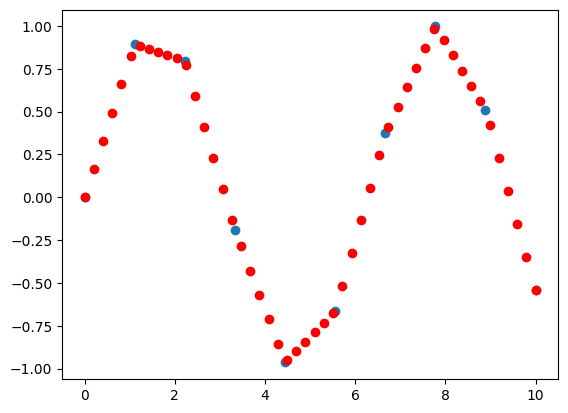

In [27]:
# Puis on pratiquant une interpolation linéaire dessus on aura :

f = interp1d(x, y, kind='linear')

new_x = np.linspace(0, 10, 50)

result = f(new_x)

plt.scatter(x, y)
plt.scatter(new_x, result, c='red')
plt.show()


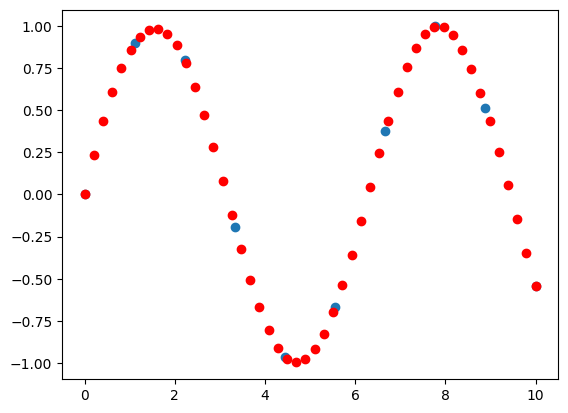

In [28]:
# Eh bien... c'est pas joli joli 😈

# Dans ce cas là on préfère prendre une interpolation disons cubique...

f = interp1d(x, y, kind='cubic')

new_x = np.linspace(0, 10, 50)

result = f(new_x)

plt.scatter(x, y)
plt.scatter(new_x, result, c='red')
plt.show()